In [1]:
import numpy as np
import pandas as pd
from pydataset import data
import env
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import acquire as acq
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import os
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from io import StringIO

In [2]:
acq.get_titanic_data()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
#download and prep data
titanic = acq.get_titanic_data()
titanic = acq.prep_titanic(titanic)
titanic.head()

csv file found and loaded


,survived,pclass,sibsp,parch,fare,alone
0,0,3,1,0,7.2500,0
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,1
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


In [4]:
#split the data
X = titanic.drop(columns= 'survived')
Y = titanic.survived

#Turn the splits into dataframes

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

In [5]:
X_train.head()

,pclass,sibsp,parch,fare,alone
455,3,0,0,7.8958,1
380,1,0,0,227.5250,1
492,1,0,0,30.5000,1
55,1,0,0,35.5000,1
243,3,0,0,7.1250,1


In [6]:
X_validate.head()

,pclass,sibsp,parch,fare,alone
176,3,3,1,25.4667,0
372,3,0,0,8.0500,1
678,3,1,6,46.9000,0
778,3,0,0,7.7375,1
463,2,0,0,13.0000,1


In [7]:
X_test.head()

,pclass,sibsp,parch,fare,alone
561,3,0,0,7.8958,1
641,1,0,0,69.3000,1
400,3,0,0,7.9250,1
498,1,1,2,151.5500,0
875,3,0,0,7.2250,1


In [12]:
y_train.head()

,survived
455,1
380,1
492,0
55,1
243,0


In [8]:
y_validate.head()

,survived
176,0
372,0
678,0
778,0
463,0


In [9]:
y_test.head()

,survived
561,0
641,1
400,1
498,0
875,1


What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [10]:
baseline_accuracy = (y_train.survived == 0).mean()
baseline_accuracy

0.6161048689138576

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [15]:
tree = DecisionTreeClassifier()

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
tree.predict(X_train)[:5]

array([0, 1, 1, 1, 0])

In [20]:
tree.score(X_train, y_train)

0.8651685393258427

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [22]:
tree.score(X_train, y_train)

0.8651685393258427

In [25]:
y_pred = tree.predict(X_train)

In [27]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[326,   3],
       [ 69, 136]])

In [33]:
y_train = pd.DataFrame(y_train)

In [36]:
labels = sorted(y_train.survived.unique())
labels

[0, 1]

In [37]:
pd.DataFrame(conf)

,0,1
0,326,3
1,69,136


In [38]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       329
           1       0.98      0.66      0.79       205

    accuracy                           0.87       534
   macro avg       0.90      0.83      0.85       534
weighted avg       0.88      0.87      0.86       534



Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [39]:
conf

array([[326,   3],
       [ 69, 136]])

In [40]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict' for label in labels])

,0_predict,1_predict
0_actual,326,3
1_actual,69,136


positive case = survive

In [41]:
conf.ravel()

array([326,   3,  69, 136])

In [42]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(326, 3, 69, 136)

In [43]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision = TP / (TP + FP)
f1 = 2 * ((precision * recall) / (precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [44]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8651685393258427

True Positive Rate/Sensitivity/Recall/Power: 0.6634146341463415
False Positive Rate/False Alarm Ratio/Fall-out: 0.00911854103343465
True Negative Rate/Specificity/Selectivity: 0.9908814589665653
False Negative Rate/Miss Rate: 0.33658536585365856

Precision/PPV: 0.9784172661870504
F1 Score: 0.7906976744186046

Support (0): 205
Support (1): 329


Run through steps 2-4 using a different max_depth value.

In [45]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.6666666666666666

In [46]:
for x in range(1,20):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')


for depth of  1, the accuracy is 0.67
for depth of  2, the accuracy is 0.7
for depth of  3, the accuracy is 0.7
for depth of  4, the accuracy is 0.74
for depth of  5, the accuracy is 0.76
for depth of  6, the accuracy is 0.77
for depth of  7, the accuracy is 0.78
for depth of  8, the accuracy is 0.79
for depth of  9, the accuracy is 0.81
for depth of 10, the accuracy is 0.82
for depth of 11, the accuracy is 0.84
for depth of 12, the accuracy is 0.85
for depth of 13, the accuracy is 0.86
for depth of 14, the accuracy is 0.86
for depth of 15, the accuracy is 0.86
for depth of 16, the accuracy is 0.86
for depth of 17, the accuracy is 0.87
for depth of 18, the accuracy is 0.87
for depth of 19, the accuracy is 0.87


Which model performs better on your in-sample data?

In [ ]:
Which model performs best on your out-of-sample data, the validate set?

In [48]:
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    
    val_acc = tree.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [49]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.666667,0.657303
1,2,0.700375,0.702247
2,3,0.704120,0.691011
3,4,0.737828,0.702247
4,5,0.764045,0.713483


In [50]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [51]:
scores_df.sort_values('diff').head()

,max_depth,train_acc,val_acc,diff
1,2,0.700375,0.702247,-0.001873
0,1,0.666667,0.657303,0.009363
2,3,0.704120,0.691011,0.013109
5,6,0.771536,0.741573,0.029963
3,4,0.737828,0.702247,0.035581


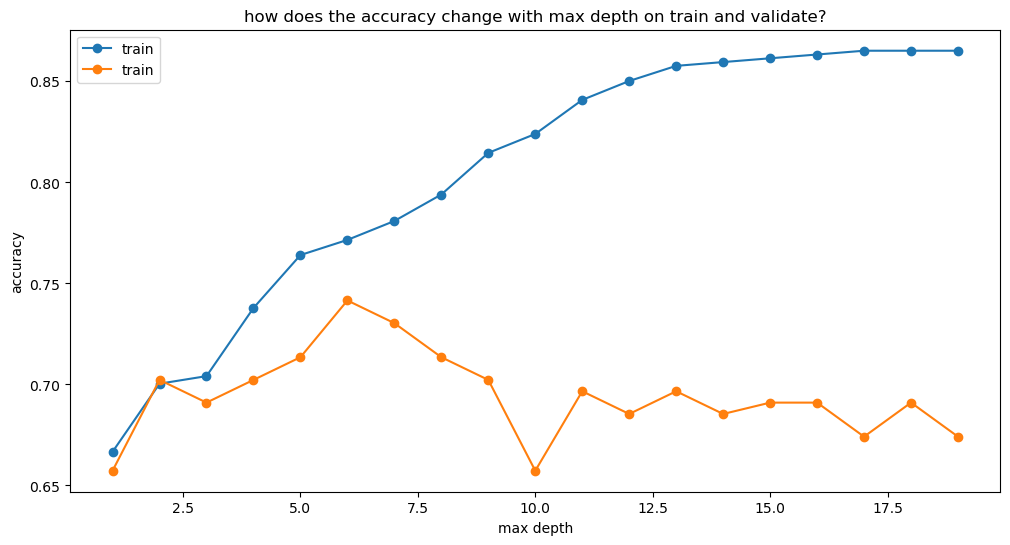

In [52]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()